<a href="https://colab.research.google.com/github/WangariNgomi/Machine-Learning/blob/main/Miriam_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.0) Predicting whether or not an employee is a social drinker, based on their attendance record.**

The dataset used can be found [here](https://docs.google.com/spreadsheets/d/1KUwbcurAlA7Y7pQAjtzCBCdiYomDMiBxhqkuUfIDXxI/edit?usp=sharing). and was obtained from [UCI repository](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#) where you can see a detailed description of each column 


#**1.1) Steps taken in the analysis**

* Identification of the task as a classification case
* Choosing the algorithim to use, I will be using Decision Trees Classifier
* Buiding the first model to predict whether or not an employee is a social    drinker
* Building the second model that predicts the month when an absence occurs
* Evaluating both models, tuning the hyperparameters and visualizing the decision trees

#**1.2) Importing the libraries**


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1.3) Loading the Dataset**

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Module 2/Datasets/Absenteeism_at_work.xlsx', index_col='ID') #loading the dataset

#displaying the first five columns
data.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


#**1.4) Data Understanding**

In [ ]:
print('Dataset Length is :', len(data)) #displaying number of rows
print('Dataset Shape is :', data.shape) #displaying the dataset's number of rows and columns

Dataset Length is : 740
Dataset Shape is : (740, 20)


In [ ]:
#displaying the columns
data.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

**observation**



*   Column names are not in the right format, the next step is renaming them in the right format



In [ ]:
#we need to make a copy of the original dataset
data_copy = data.copy(deep=True) # Modifications to the data of the copy will not be reflected in the original object
data_copy.head(3) #previewing the first three rows

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0


In [ ]:
# Renaming columns into the right format
col_names = data_copy.columns.tolist() # getting a list of the columns
for col in range(len(col_names)): 
  col_names[col] = col_names[col].lower().replace(" ", "_")
data_copy.columns = col_names

In [ ]:
data_copy.columns #confirmimg the column names

Index(['reason_for_absence', 'month_of_absence', 'day_of_the_week', 'seasons',
       'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

Column names are now in the right format

In [ ]:
#displaying summary statistics of the dataset
data_copy.describe(include = 'all')

,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


**Observation**

 * Reason for absence, Month of absence, Day of the week, Seasons, Social drinker and Social smoker columns are categorical and the  rest are continuous.

We've selected a few independent variables to use. We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few. 

#1.5) Modelling

#### i) The first model we are going to build wil predict whether or not an employee is a social drinker

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data_copy['social_drinker'].values

test_features = ['day_of_the_week', 'distance_from_residence_to_work', 'age', 'body_mass_index', 'disciplinary_failure', 'education']
# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data_copy[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



Let's finally create our model and assess its accuracy using confusion matrix and find the accuraccy of the prediction

In [ ]:
# Create a decision tree classifier

clf = DecisionTreeClassifier()

# Train it on our training set.
model = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('The accuracy of our model is' + ' ' + str(accuracy_score(y_test, y_pred)))


[[ 87   0]
 [  1 134]]
The accuracy of our model is 0.9954954954954955


The model looks extremely accurate! This would be a result of overfitting and will perform well on the training data and will perform poorly in predicting the behavior of folks from other companies, or other countries. 


####ii)Visualizing the Decision Tree

To get a better sense of the inner workings of our decision tree, let's visualize it. Note in particular some parameters in the export_graphviz function:


1.   The first parameter should be your model
2.   The feature_names parameter should have all the names of your independent variables. It's often handy to have a variable that stores that.
3. class_names is a list of the various categories you are classifying. There should be as many entries as there are categories for your dependent variable - In this case Social drinker has two values: 0, and 1. We give matching class names to each: 'Not a social drinker', 'Social drinker'

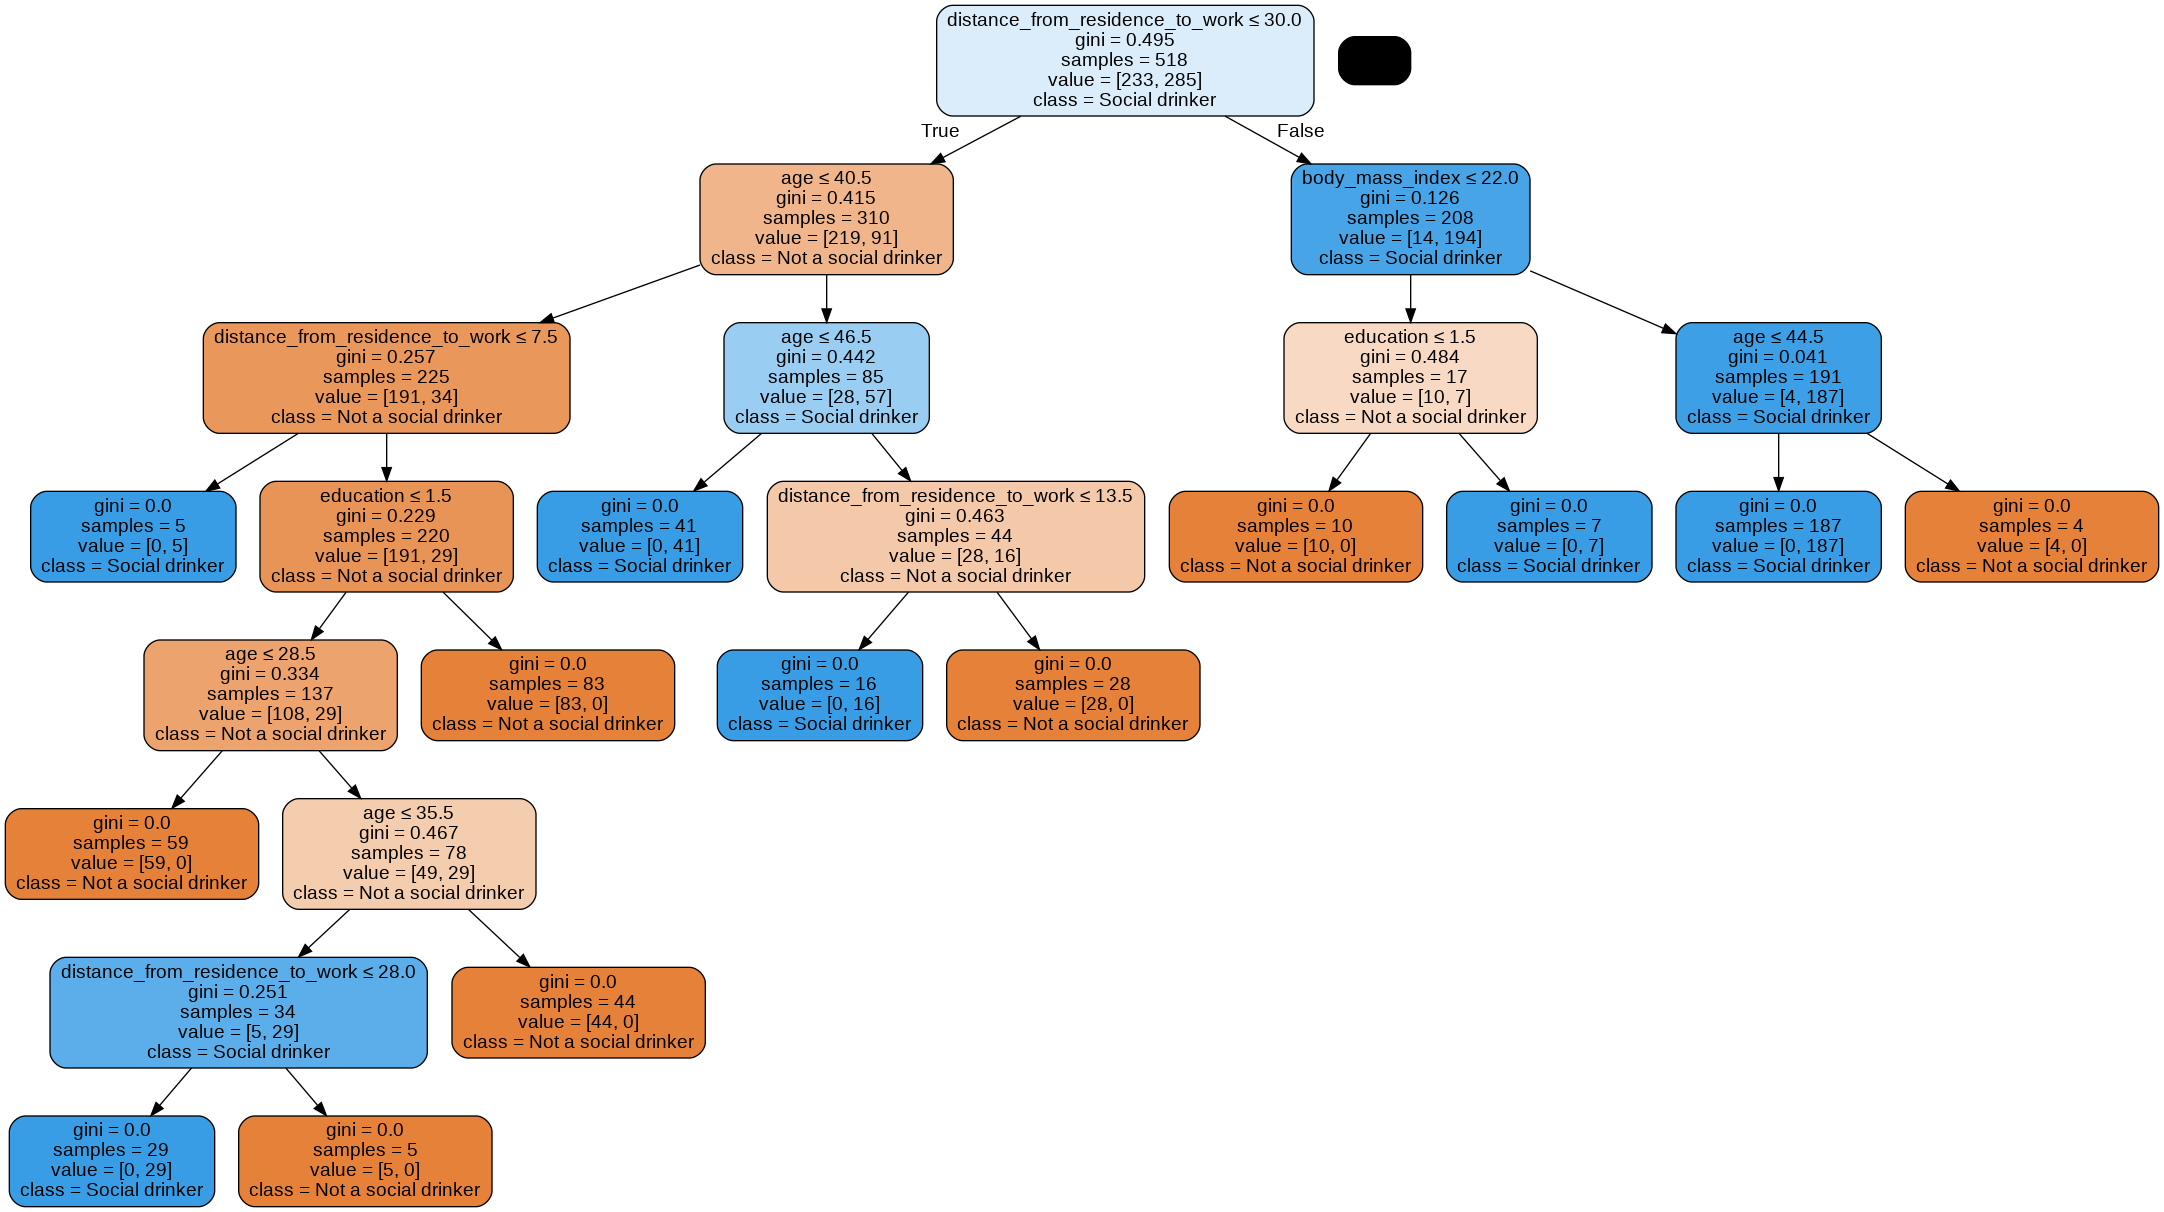

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Not a social drinker', 'Social drinker'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

**Observation**

* Starting from the **root node**, the first test we perform is based on distance from residence to work. The datasets are split based on a distance of 30. Notice the value parameter. Here, value = [233, 285] 
* This means that in our current training set, there are 233 non social drinkers, and 285 social drinkers. Because of this majority, my root node has a class of *social drinker*

* On the left children of our root node. This node has a class of *not a social drinker*, indicating that the left side of our tree should have a bias towards non social drinkers. If you look at the values there, you should clearly see that.

* the left child has value = [219, 91]: Using that first test, we were able to isolate almost all non drinkers! As expected, the right children of our root node has a class of *social drinker*, with values to match: [14, 194]

A few things of interest as well:


*   Each node has a ***gini*** value. We will cover those in depth in our next section on optimization
*   Not all of our features were used, for example *Day of the week* appears nowhere in our tree, suggesting that our dependent variable does not majorly depend on it.




In [ ]:
# viewing how the decision making process looks like using text
from sklearn import tree
print(tree.export_text(clf))

|--- feature_1 <= 30.00
|   |--- feature_2 <= 40.50
|   |   |--- feature_1 <= 7.50
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  7.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- feature_2 <= 28.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_2 >  28.50
|   |   |   |   |   |--- feature_2 <= 35.50
|   |   |   |   |   |   |--- feature_1 <= 28.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_1 >  28.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  35.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  1.50
|   |   |   |   |--- class: 0.0
|   |--- feature_2 >  40.50
|   |   |--- feature_2 <= 46.50
|   |   |   |--- class: 1.0
|   |   |--- feature_2 >  46.50
|   |   |   |--- feature_1 <= 13.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  13.50
|   |   |   |   |--- class: 0.0
|--- feature_1 >  30.00
|   |--- feature_3 <= 22.00
|   |   |--- feature

This is not the best way to visualize the decision tree since the feature names are not dispalyed. we are going to plot the decision tree using the code below

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (50, 30))

# tree.plot_tree(clf, feature_names = test_features,class_names= data_copy['social_drinker'].values, filled = True)


#### iii) The second model we are going to build predicts the month when an absence occurs using all features apart from seasons

In [ ]:
# displaying counts of unique values
data_copy['month_of_absence'].value_counts()

3.0     87
2.0     72
10.0    71
7.0     67
5.0     64
11.0    63
8.0     54
6.0     54
9.0     53
4.0     53
1.0     50
12.0    49
0.0      3
Name: month_of_absence, dtype: int64

In [ ]:
# Splitting the independent and dependent variables
# We want to predict the month when an absence occurs, so month_of_absence will be Y 
y = data_copy['month_of_absence'].values

# we will use all features available, except for Season
test_features =data_copy.columns.drop('seasons') 

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data_copy[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
# Creating our model

clf1 = DecisionTreeClassifier()

# Train it on our training set.
model1 = clf1.fit(X_train, y_train)

# Predict based on the model we've trained
y_predict1 = model1.predict(X_test)

# evaluating model perfomance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_predict1)
print(cm)

print('The accuracy of our model is' + ' ' + str(accuracy_score(y_test, y_predict1)))



[[ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14]]
The accuracy of our model is 0.9954954954954955


Our model is 98.19% accurate. This means it poses a risk of overfitting. 

In [ ]:
# Solving the problem of overfitting by tuning the hyperparameters

clf2 = DecisionTreeClassifier(max_depth = 5)

# Train it on our training set.
model2 = clf2.fit(X_train, y_train)

# Predict based on the model we've trained
y_predict2 = model2.predict(X_test)

# evaluating model perfomance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_predict2)
print(cm)

print('The accuracy of our model is' + ' ' + str(accuracy_score(y_test, y_predict2)))

[[ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0]]
The accuracy of our model is 0.7657657657657657


After limiting our max_depth to 5, our model perfomance has decreased its perfomance from 100% accuracy to 75.22% accuracy. The next step is to visualize the decision tree to determine if we need to tune the hyperparameters further.

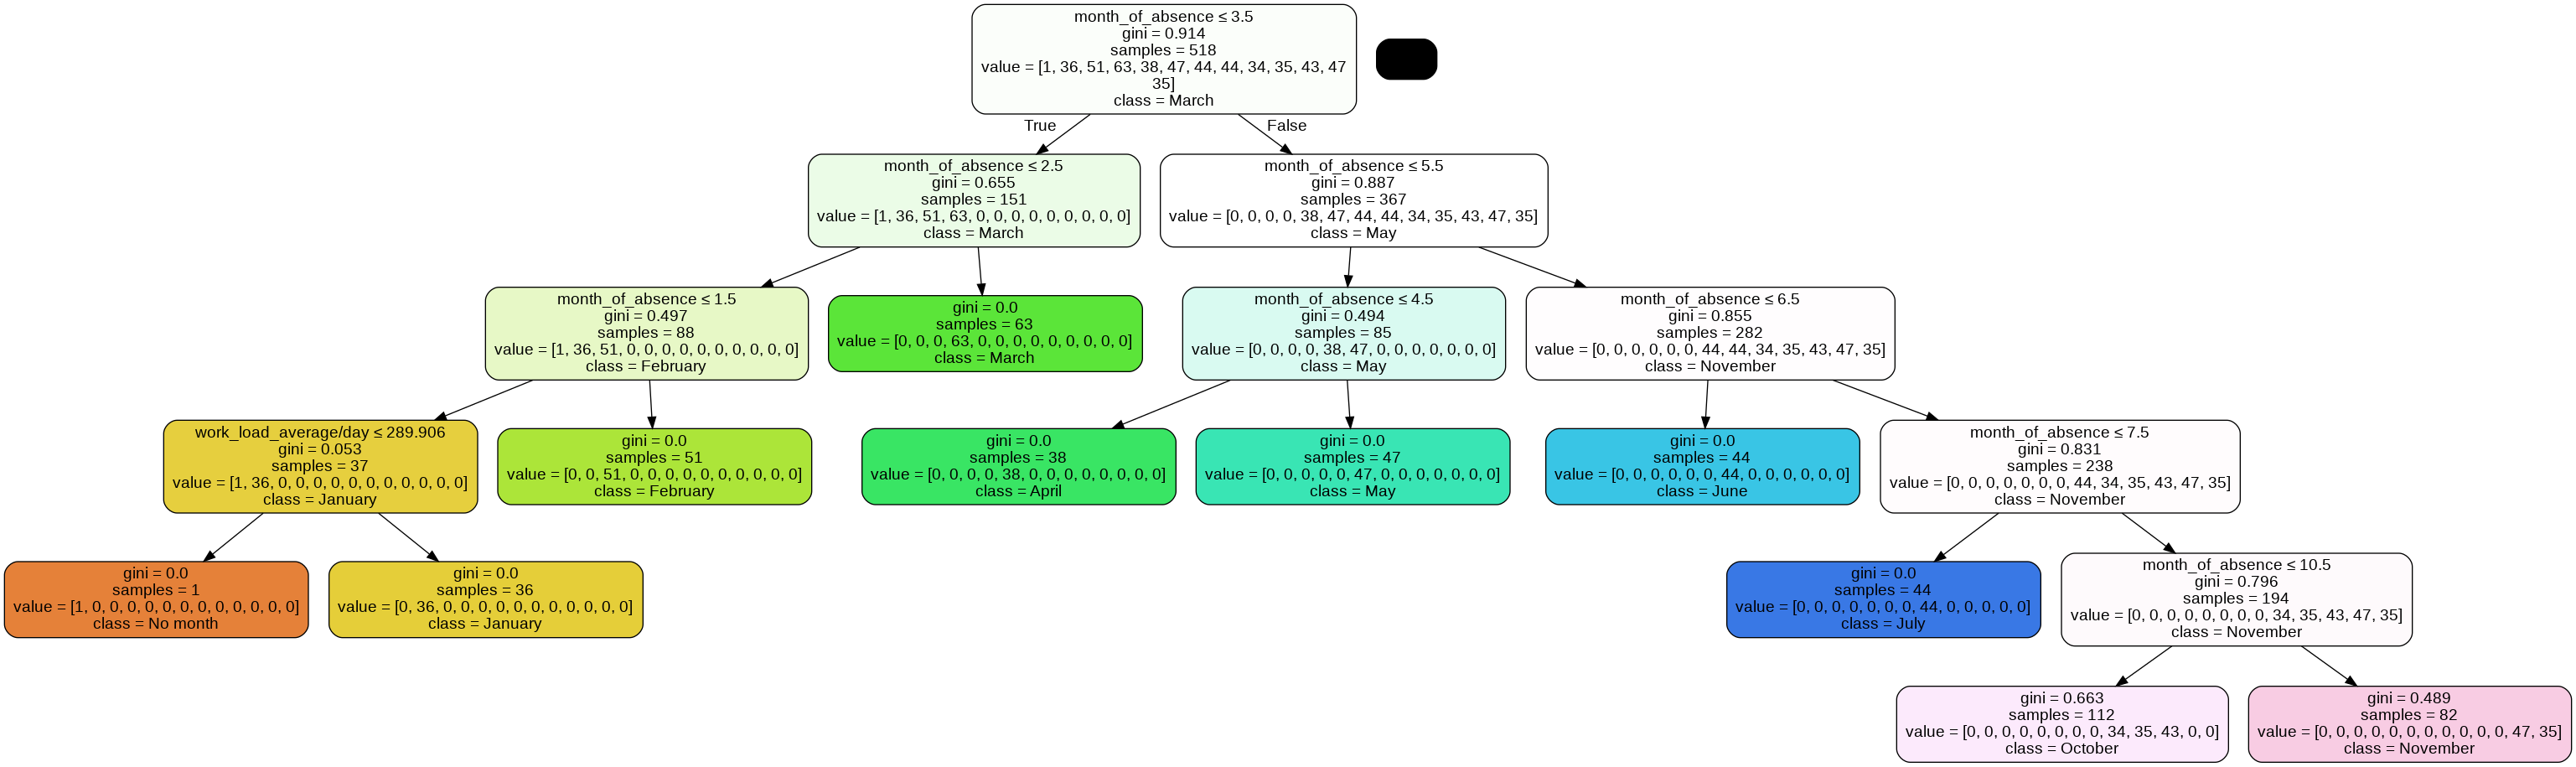

In [ ]:
# visualizing the decision tree
dot_data1=StringIO()
export_graphviz(clf2, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True, feature_names= test_features, 
                class_names=['No month', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph.write_png('month_of_absence.png')
Image(graph.create_png())

**Observation**

* Not all of our features were used, only month of absence and reason for absence were used meaning these were the only features that had a larger impact on the dependent variable.

* Starting from the **root node** the test is based on whether the month of abscence is less than or equal to 3.5 using a sample size of **518**, the majority fell under the month of March hence the class March.


* The tree continues splitting and testing by the use of month of abscence and used the feature work load/average in one instance. 

* The gini value on the last leaf nodes has not been exhausted and we need to tune our hyperparameters further



  In the next step I will be tuning my hyperparameters to find the best min_samples_split

In [ ]:
# Ccreating a dictionary of all the parameters and their corresponding 
# set of values that I want to test for best performance.
best_params = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [3, 5, 7]
    }

In [ ]:
# the next step is to create an instance of the GridSearchCV class. 
# We need to pass values for the estimator parameter
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator = clf2,
                     param_grid = best_params,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [ ]:
# Calling the fit method
# # Once the GridSearchCV class is initialized, we call the fit method of the class 
# # and pass it the training and test set
gd_sr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_split': [3, 5, 7]},
             scoring='accuracy')

In [ ]:
# Checking the parameters that return the highest accuracy
best_parameters = gd_sr.best_params_
print(best_parameters)


{'max_depth': 7, 'min_samples_split': 3}


In [ ]:
# The last and final step of Grid Search algorithm is 
# to find the accuracy obtained using the best parameters. 
best_result = gd_sr.best_score_
print(best_result)


0.998076923076923


In [ ]:
# Solving the problem of overfitting by tuning the hyperparameters

clf3 = DecisionTreeClassifier(max_depth = 7, min_samples_split = 3 )

# Train it on our training set.
model3 = clf3.fit(X_train, y_train)

# Predict based on the model we've trained
y_predict3 = model3.predict(X_test)

# evaluating model perfomance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_predict3)
print(cm)

print('The accuracy of our model is' + ' ' + str(accuracy_score(y_test, y_predict3)))

[[ 2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14]]
The accuracy of our model is 0.9954954954954955


**Observation**

After adding min_samples split, my model is 100% accurate

2.   Which features are most relevant in determining our dependent variable? Does it make intuitive sense to you?






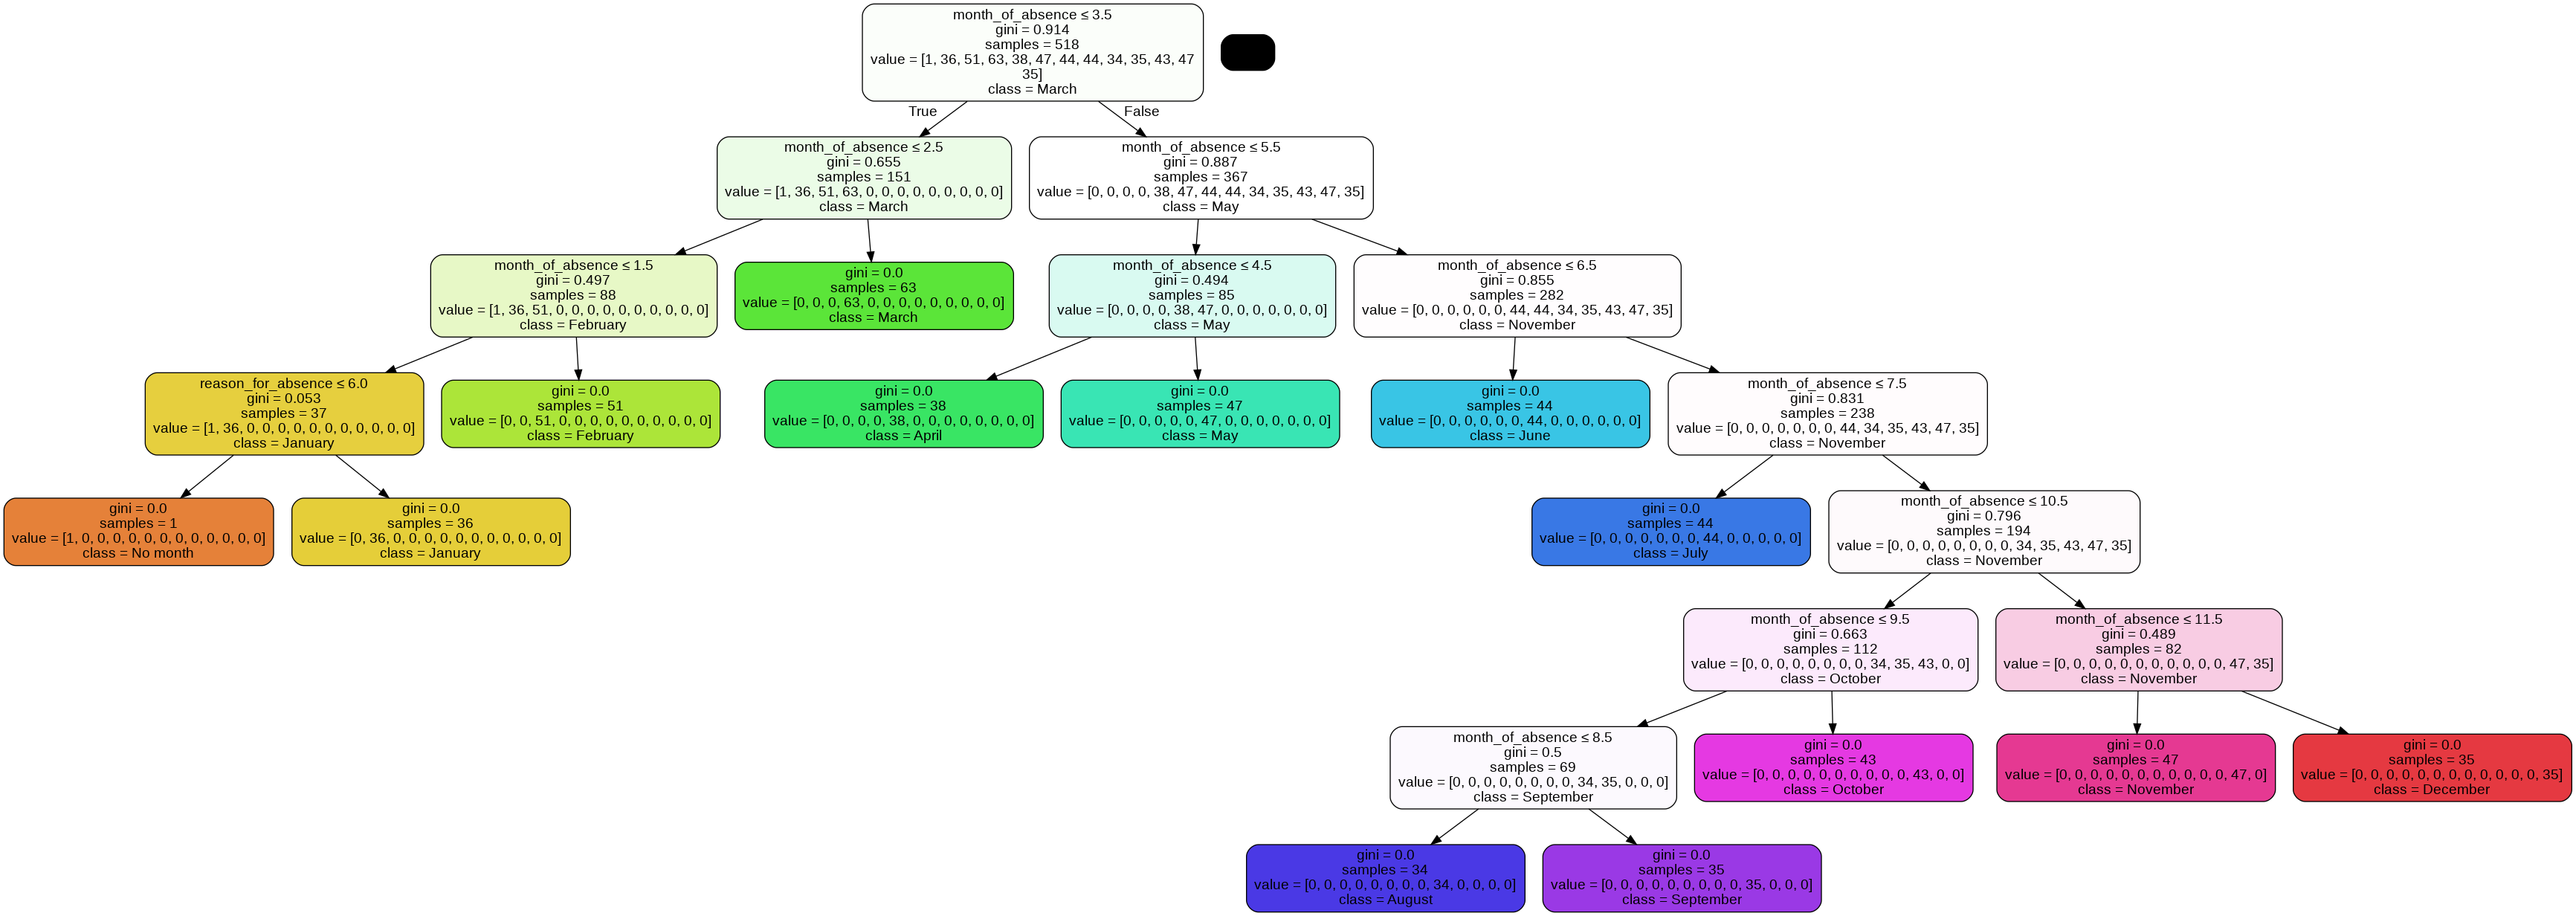

In [ ]:
# visualizing the decision tree of the tuned model
dot_data1=StringIO()
export_graphviz(clf3, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True, feature_names= test_features, 
                class_names=['No month', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph.write_png('month_of_absence.png')
Image(graph.create_png())

**Observation**

* Aftertuning our hyperparameters, The tree continues splitting and testing by the use of month of abscence and used the feature reason for abcsence instead of work load/average in one instance.

* The gini value was exhausted to 0 and the final outcome is that January is the month when most abscence occurs



In [ ]:
clf3.feature_importances_

array([0.00410979, 0.99589021, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
feats = {}
for feature, imp in zip(data_copy.columns, importance):
  feats[feature] = imp

In [ ]:
feats

{'reason_for_absence': 0.0041097901071481015,
 'month_of_absence': 0.9958902098928518,
 'day_of_the_week': 0.0,
 'seasons': 0.0,
 'transportation_expense': 0.0,
 'distance_from_residence_to_work': 0.0,
 'service_time': 0.0,
 'age': 0.0,
 'work_load_average/day': 0.0,
 'hit_target': 0.0,
 'disciplinary_failure': 0.0,
 'education': 0.0,
 'son': 0.0,
 'social_drinker': 0.0,
 'social_smoker': 0.0,
 'pet': 0.0,
 'weight': 0.0,
 'height': 0.0,
 'body_mass_index': 0.0}

In [ ]:
importance = clf3.feature_importances_

for i, v in enumerate(importance):
  print('Feature : , Score : ', (i,v))


Feature : , Score :  (0, 0.0041097901071481015)
Feature : , Score :  (1, 0.9958902098928518)
Feature : , Score :  (2, 0.0)
Feature : , Score :  (3, 0.0)
Feature : , Score :  (4, 0.0)
Feature : , Score :  (5, 0.0)
Feature : , Score :  (6, 0.0)
Feature : , Score :  (7, 0.0)
Feature : , Score :  (8, 0.0)
Feature : , Score :  (9, 0.0)
Feature : , Score :  (10, 0.0)
Feature : , Score :  (11, 0.0)
Feature : , Score :  (12, 0.0)
Feature : , Score :  (13, 0.0)
Feature : , Score :  (14, 0.0)
Feature : , Score :  (15, 0.0)
Feature : , Score :  (16, 0.0)
Feature : , Score :  (17, 0.0)
Feature : , Score :  (18, 0.0)


#**2.0) Predicting whether or not individuals will subscribe to a term deposit.**


We will be using a data set on banking information of various individuals that includes their banking status, and how much marketing content they have received from the bank to predict whether or not they will subscribe to a term deposit indicated by the variable **y** in the dataset.

More information about the various columns, can be found [here](https://data.world/data-society/bank-marketing-data)



#**2.1) Steps taken in the analysis**

* Identification of the task as a classification case
* Choosing the algorithim to use, I will be using Decision Trees Classifier
* Buiding the first model to predict whether or not individuals will subscribe to a term deposit
* Evaluating the model and tuning the hyperparameters to improve the model
* Bring in this separate dataset:  
```
further_test = pd.read_csv('https://query.data.world/s/qy4uqnoc56ydidfkkneozx3rmmmq7o', delimiter = ';')``` 

* Test my model's accuracy against this new set.




#**2.2) Loading the Dataset**

In [ ]:
df = pd.read_csv('https://query.data.world/s/nr56ywwu5g7m5lystbjm25ouxj2l6e', delimiter = ';')
df.head(3) # displaying the first three entries

In [ ]:
df.columns
# Your code goes here

In [ ]:
df['y'].value_counts

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["job"]])
oe_results
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

How accurate is the model you've created? What parameters have you used to tweak it? 

Once you are confident with the model you've created, bring in this separate dataset:


```
further_test = pd.read_csv('https://query.data.world/s/qy4uqnoc56ydidfkkneozx3rmmmq7o', delimiter = ';')
```

Test your model's accuracy against this new set. What can you conclude about the fit of your model?
